In [101]:
get_rotation_matrix = function(radians, axis=0){
    # https://en.wikipedia.org/wiki/Rotation_matrix#In_three_dimensions
    if (axis==0){
        return(matrix(c(1,0,0,0,cos(radians), sin(radians), 0, -sin(radians), cos(radians)), 3, 3))
    } else if(axis == 1){
        return(matrix(c(cos(radians), 0, -sin(radians), 0, 1, 0, sin(radians), 0, cos(radians)), 3, 3))
    } else {
        return(matrix(c(cos(radians), sin(radians), 0, -sin(radians), cos(radians), 0, 0, 0, 1), 3, 3))
    }
}

get_3axis_rotation_matrix = function(x, y, z){
    return(get_rotation_matrix(x, 0) %*% get_rotation_matrix(y, 1) %*% get_rotation_matrix(z, 2))
}

In [102]:
rotate_cube = function(cube, ...){
    return(cube %*% get_3axis_rotation_matrix(...))
}

In [116]:
draw_cube = function(cube, from_axis=0){
    # Given cube with sorted points
    
    # Axis from which to view cube
    if(from_axis == 0){
        ax = c(2, 3)
    } else if(from_axis == 1){
        ax = c(1, 3)
    } else {
        ax = c(1, 2)
    }
    
    # Draws 2 squares and connects the corners to make a cube
    side1 = cube[c(1,2,4,3,1),]
    side2 = cube[c(1,2,4,3,1) + 4,]
    lines(side1[,ax[1]], side1[,ax[2]])
    lines(side2[,ax[1]], side2[,ax[2]])
    
    for(i in 1:4){
        connector = rbind(side1[i,], side2[i,])
        lines(connector[,ax[1]], connector[,ax[2]])
    }
}

In [114]:
cube= matrix(c(0,0,0, 0,0,1, 0,1,0, 0,1,1, 1,0,0, 1,0,1, 1,1,0, 1,1,1), byrow=T, 8, 3)
cube

0,0,0
0,0,1
0,1,0
0,1,1
1,0,0
1,0,1
1,1,0
1,1,1


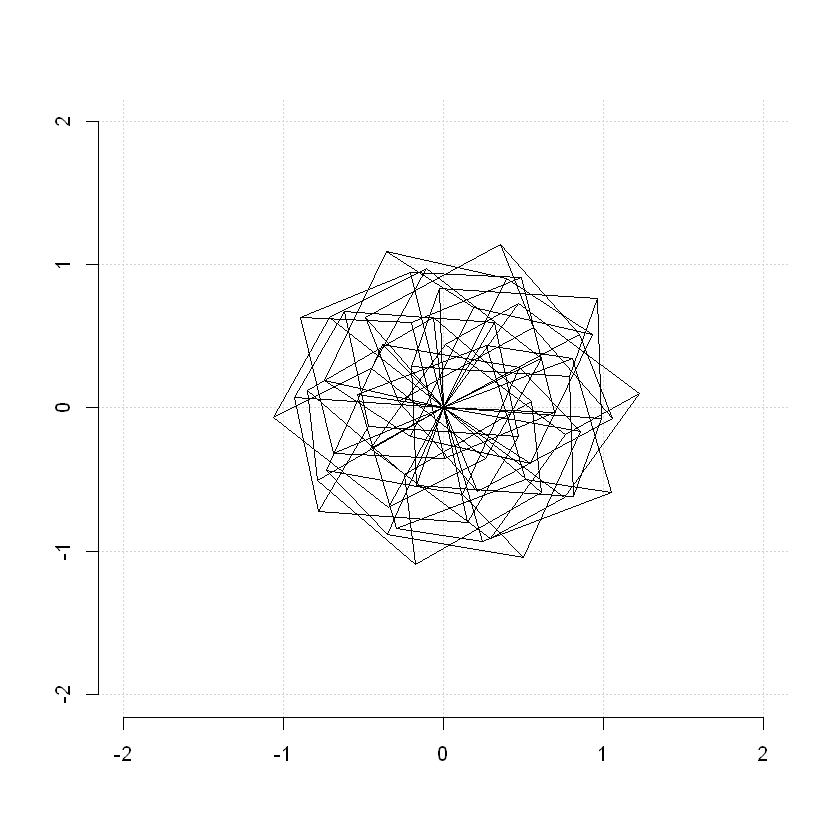

In [124]:
plot.new()
plot.window(xlim=c(-2,2), ylim=c(-2,2))
grid()
axis(1)
axis(2)


# Draw cubes
rotations = 10
for(i in c(1:rotations))
{
 cube = rotate_cube(cube, 2*pi/rotations, pi/50, 0)
 draw_cube(cube, 0)
}